In [4]:
from datetime import datetime
import statsmodels.api as sm
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
start = datetime(2017, 8, 3)
end = datetime(2022, 8, 6)

market = yf.Ticker('SPY').history(start=start, end=end)
stock = yf.Ticker('AAPL').history(start=start, end=end)
riskfree = yf.Ticker('^TNX').history(start=start, end=end)

daily_returns = pd.DataFrame({
    'market': market['Close'].pct_change(1) * 100,
    'stock': stock['Close'].pct_change(1) * 100,
    'riskfree': (1 + riskfree['Close']) ** (1/360) - 1
})

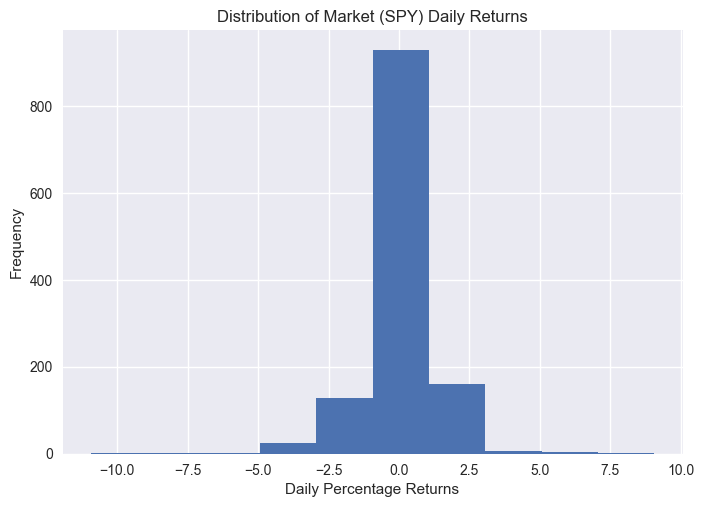

Descriptive Statistics of the Market's daily percentage returns:
count    1260.000000
mean        0.056181
std         1.291005
min       -10.942374
25%        -0.382290
50%         0.098965
75%         0.647036
max         9.060325
Name: market, dtype: float64


In [ ]:
plt.hist(daily_returns['market'])
plt.title('Distribution of Market (SPY) Daily Returns')
plt.xlabel('Daily Percentage Returns')
plt.ylabel('Frequency') 
plt.show()

print(
    "Descriptive Statistics of the Market's daily percentage returns:\n"
    f"{daily_returns['market'].describe()}"
)

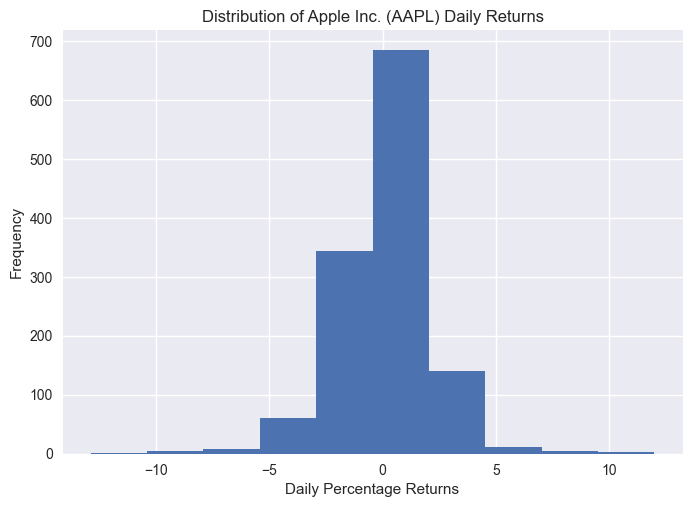

Descriptive Statistics of the Apple's daily percentage returns:
count    1260.000000
mean        0.139897
std         2.024183
min       -12.864719
25%        -0.798024
50%         0.120530
75%         1.218055
max        11.980856
Name: stock, dtype: float64


In [11]:
plt.hist(daily_returns['stock'])
plt.title('Distribution of Apple Inc. (AAPL) Daily Returns')
plt.xlabel('Daily Percentage Returns') 
plt.ylabel('Frequency')
plt.show()

print(
    "Descriptive Statistics of the Apple's daily percentage returns:\n"
    f"{daily_returns['stock'].describe()}"
)

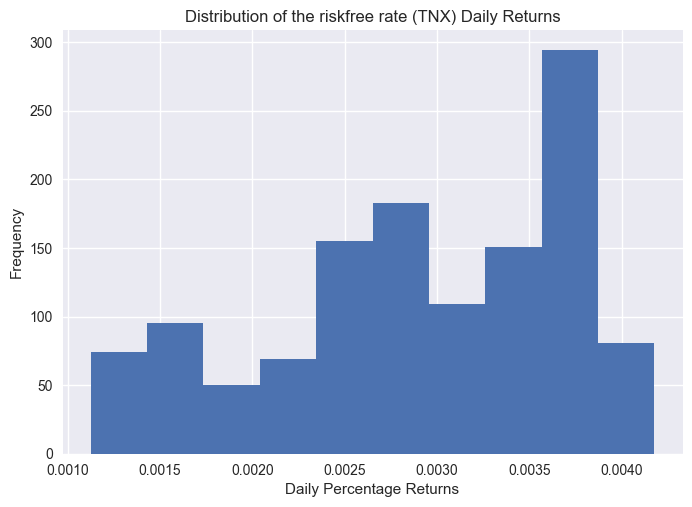

Descriptive Statistics of the 10 year note daily percentage returns:
count    1261.000000
mean        0.002909
std         0.000803
min         0.001125
25%         0.002460
50%         0.002967
75%         0.003660
max         0.004176
Name: riskfree, dtype: float64


In [12]:
plt.hist(daily_returns['riskfree'])
plt.title('Distribution of the riskfree rate (TNX) Daily Returns')
plt.xlabel('Daily Percentage Returns')
plt.ylabel('Frequency')
plt.show()

print(
    "Descriptive Statistics of the 10 year note daily percentage returns:\n"
    f"{daily_returns['riskfree'].describe()}"
)

In [15]:
market.index.difference(riskfree.index)
daily_returns = daily_returns.ffill()
daily_returns = daily_returns.dropna()
print(f"Number of null values in each column:\n{daily_returns.isnull().sum()}")
daily_returns.head()

Number of null values in each column:
market      0
stock       0
riskfree    0
dtype: int64


,market,stock,riskfree
Date,,,
2017-08-04 04:00:00+00:00,0.182210,0.527113,0.003260
2017-08-04 05:00:00+00:00,0.182210,0.527113,0.003294
2017-08-07 04:00:00+00:00,0.185944,1.547397,0.003294
2017-08-07 05:00:00+00:00,0.185944,1.547397,0.003285
2017-08-08 04:00:00+00:00,-0.246120,0.799705,0.003285


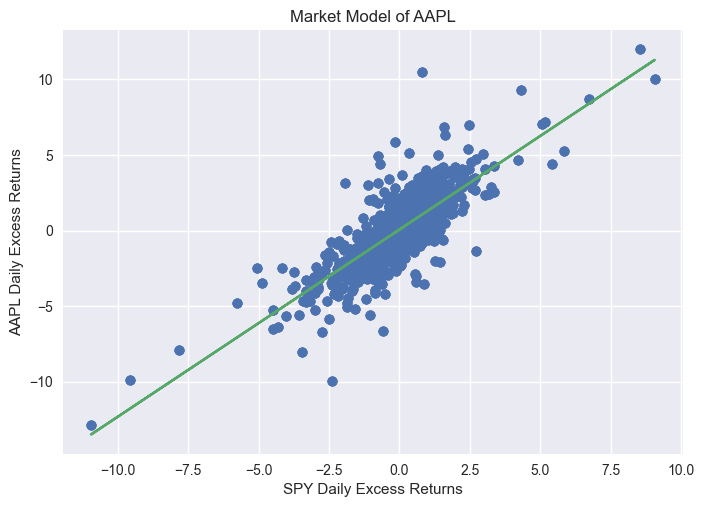

In [16]:
stock_excessive_returns = daily_returns['stock'] - daily_returns['riskfree']
market_excessive_returns = daily_returns['market'] - daily_returns['riskfree']

plt.scatter(market_excessive_returns, stock_excessive_returns)

market_excessive_returns = sm.add_constant(market_excessive_returns)

market_model = sm.OLS(stock_excessive_returns, market_excessive_returns).fit()

# Plot the line of best fit
plt.plot(
    market_excessive_returns, 
    market_excessive_returns * market_model.params[0] + market_model.params['const']
)
plt.title('Market Model of AAPL')
plt.xlabel('SPY Daily Excess Returns'), 
plt.ylabel('AAPL Daily Excess Returns')
plt.show()

In [18]:
print(
    "According to AAPL's Market Model, "
    f"the security had a realized Alpha of {round(market_model.params['const'],2)}% "
    f"and Beta of {round(market_model.params[0],2)}"
)
print(
    "The Market Model of AAPL is summarized below:\n"
    f"{market_model.summary()}"
)

According to AAPL's Market Model, the security had a realized Alpha of 0.07% and Beta of 1.24
The Market Model of AAPL is summarized below:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     4177.
Date:                Sat, 14 Feb 2026   Prob (F-statistic):               0.00
Time:                        23:50:06   Log-Likelihood:                -4119.6
No. Observations:                2520   AIC:                             8243.
Df Residuals:                    2518   BIC:                             8255.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025    